In [1]:
#importing libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
data = pd.read_csv("data.txt", sep = ' ',header = None, names = ['date', 'time','epoch','moteid','temperature','humidity','light','voltage'],index_col=False, dtype='unicode')
data.head(6)

,date,time,epoch,moteid,temperature,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1,122.153,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1,19.9884,37.0933,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1,19.3024,38.4629,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1,19.1652,38.8039,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1,19.175,38.8379,45.08,2.69964
5,2004-02-28,01:08:45.992524,22,1,19.1456,38.9401,45.08,2.68742


In [4]:
data.tail()

,date,time,epoch,moteid,temperature,humidity,light,voltage
2313677,2004-04-02,01:14:54.164318,61274,0,0,0,0,0
2313678,2004-04-02,01:17:53.670524,61275,0,0,0,0,0
2313679,2004-04-02,01:20:52.807972,61276,0,0,0,0,0
2313680,2004-04-02,01:26:53.950342,61278,0,0,0,0,0
2313681,2004-04-02,01:35:53.897412,61280,0,0,0,0,0


In [ ]:
#Replacing NaN values to 0

In [5]:
data.fillna(0, inplace=True)
data['epoch'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
data['epoch'] = data['epoch'].astype(int)
data.to_csv('intel_lab_clean.csv')

In [6]:
df = data
df[['epoch', 'moteid','temperature','humidity','light','voltage']] = df[['epoch', 'moteid','temperature','humidity','light','voltage']].astype(float)

df.describe()

,epoch,moteid,temperature,humidity,light,voltage
count,2.313682e+06,2.313682e+06,2.313682e+06,2.313682e+06,2.313682e+06,2.313682e+06
mean,3.303993e+04,2.853763e+01,3.919173e+01,3.389492e+01,3.906884e+02,2.491985e+00
std,1.836852e+04,5.062016e+01,3.741994e+01,1.733108e+01,5.344443e+02,1.834440e-01
min,0.000000e+00,0.000000e+00,-3.840000e+01,-8.983130e+03,0.000000e+00,0.000000e+00
25%,1.757200e+04,1.700000e+01,2.040980e+01,3.187760e+01,1.840000e+01,2.385220e+00
50%,3.332700e+04,2.900000e+01,2.243840e+01,3.928030e+01,1.435200e+02,2.527320e+00
75%,4.778900e+04,4.100000e+01,2.701500e+01,4.358550e+01,5.078400e+02,2.627960e+00
max,6.553500e+04,6.540700e+04,3.855680e+02,1.375120e+02,1.847360e+03,1.856000e+01


In [34]:
#Creating Timestamp dataframe

In [7]:
data['timestamp'] = data[['date', 'time']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

In [8]:
df1= data
del df1['date']
del df1['time']
df1

,epoch,moteid,temperature,humidity,light,voltage,timestamp
0,2.0,1.0,122.1530,-3.91901,11.04,2.03397,2004-03-31 03:38:15.757551
1,3.0,1.0,19.9884,37.09330,45.08,2.69964,2004-02-28 00:59:16.02785
2,11.0,1.0,19.3024,38.46290,45.08,2.68742,2004-02-28 01:03:16.33393
3,17.0,1.0,19.1652,38.80390,45.08,2.68742,2004-02-28 01:06:16.013453
4,18.0,1.0,19.1750,38.83790,45.08,2.69964,2004-02-28 01:06:46.778088
5,22.0,1.0,19.1456,38.94010,45.08,2.68742,2004-02-28 01:08:45.992524
6,23.0,1.0,19.1652,38.87200,45.08,2.68742,2004-02-28 01:09:22.323858
7,24.0,1.0,19.1652,38.80390,45.08,2.68742,2004-02-28 01:09:46.109598
8,25.0,1.0,19.1456,38.83790,45.08,2.69964,2004-02-28 01:10:16.6789
9,26.0,1.0,19.1456,38.87200,45.08,2.68742,2004-02-28 01:10:46.250524


In [9]:
df1.timestamp = pd.to_datetime(df1.timestamp)
df1.set_index('timestamp', inplace=True)
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2313682 entries, 2004-03-31 03:38:15.757551 to 2004-04-02 01:35:53.897412
Data columns (total 6 columns):
epoch          float64
moteid         float64
temperature    float64
humidity       float64
light          float64
voltage        float64
dtypes: float64(6)
memory usage: 123.6 MB


,epoch,moteid,temperature,humidity,light,voltage
timestamp,,,,,,
2004-03-31 03:38:15.757551,2.0,1.0,122.1530,-3.91901,11.04,2.03397
2004-02-28 00:59:16.027850,3.0,1.0,19.9884,37.09330,45.08,2.69964
2004-02-28 01:03:16.333930,11.0,1.0,19.3024,38.46290,45.08,2.68742
2004-02-28 01:06:16.013453,17.0,1.0,19.1652,38.80390,45.08,2.68742
2004-02-28 01:06:46.778088,18.0,1.0,19.1750,38.83790,45.08,2.69964


In [10]:
df1[['moteid','temperature','humidity','light','voltage']] = df1[['moteid','temperature','humidity','light','voltage']].apply(pd.to_numeric)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2313682 entries, 2004-03-31 03:38:15.757551 to 2004-04-02 01:35:53.897412
Data columns (total 6 columns):
epoch          float64
moteid         float64
temperature    float64
humidity       float64
light          float64
voltage        float64
dtypes: float64(6)
memory usage: 123.6 MB


In [35]:
#Showing correlation through groupby moteid

In [12]:
df2= df1.groupby(['moteid']).corr()
df2.fillna(0, inplace=True)
df2

epoch  humidity     light  temperature   voltage
moteid                                                                  
0.0     epoch        1.000000  0.000000  0.000000     0.000000  0.000000
        humidity     0.000000  0.000000  0.000000     0.000000  0.000000
        light        0.000000  0.000000  0.000000     0.000000  0.000000
        temperature  0.000000  0.000000  0.000000     0.000000  0.000000
        voltage      0.000000  0.000000  0.000000     0.000000  0.000000
1.0     epoch        1.000000 -0.195395  0.014605     0.315767 -0.726957
        humidity    -0.195395  1.000000 -0.109155    -0.801979  0.537037
        light        0.014605 -0.109155  1.000000     0.016722  0.081781
        temperature  0.315767 -0.801979  0.016722     1.000000 -0.801028
        voltage     -0.726957  0.537037  0.081781    -0.801028  1.000000
2.0     epoch        1.000000 -0.159105  0.052825     0.233844 -0.657719
        humidity    -0.159105  1.000000 -0.095224    -0.752763  0.596092
        light        0.052825 -0.095224  1.000000     0.055741  0.000358
        temperature  0.233844 -0.752763  0.055741     1.000000 -0.803202
        voltage     -0.657719  0.596092  0.000358    -0.803202  1.000000
3.0     epoch        1.000000 -0.166390  0.016836     0.287500 -0.713247
        humidity    -0.166390  1.000000 -0.114200    -0.908007  0.525637
        light        0.016836 -0.114200  1.000000     0.037717  0.058113
        temperature  0.287500 -0.908007  0.037717     1.000000 -0.729883
        voltage     -0.713247  0.525637  0.058113    -0.729883  1.000000
4.0     epoch        1.000000 -0.230276 -0.018352     0.323877 -0.709500
        humidity    -0.230276  1.000000 -0.023703    -0.940304  0.783139
        light       -0.018352 -0.023703  1.000000    -0.014815  0.104677
        temperature  0.323877 -0.940304 -0.014815     1.000000 -0.870225
        voltage     -0.709500  0.783139  0.104677    -0.870225  1.000000
5.0     epoch        1.000000  0.000000  0.000000     0.000000 -0.954981
        humidity     0.000000  0.000000  0.000000     0.000000  0.000000
        light        0.000000  0.000000  0.000000     0.000000  0.000000
        temperature  0.000000  0.000000  0.000000     0.000000  0.000000
        voltage     -0.954981  0.000000  0.000000     0.000000  1.000000
...                       ...       ...       ...          ...       ...
56.0    epoch        1.000000  0.123038  0.056795    -0.195408 -0.067413
        humidity     0.123038  1.000000  0.192363    -0.743297  0.468425
        light        0.056795  0.192363  1.000000    -0.033801  0.357814
        temperature -0.195408 -0.743297 -0.033801     1.000000  0.101073
        voltage     -0.067413  0.468425  0.357814     0.101073  1.000000
57.0    epoch        1.000000 -1.000000  0.000000     0.000000 -0.995677
        humidity    -1.000000  1.000000  0.000000     0.000000  0.995735
        light        0.000000  0.000000  0.000000     0.000000  0.000000
        temperature  0.000000  0.000000  0.000000     0.000000  0.000000
        voltage     -0.995677  0.995735  0.000000     0.000000  1.000000
58.0    epoch        1.000000  0.169369  0.103942    -0.334009  0.216494
        humidity     0.169369  1.000000 -0.257984    -0.660601  0.640830
        light        0.103942 -0.257984  1.000000     0.573405  0.244811
        temperature -0.334009 -0.660601  0.573405     1.000000 -0.059959
        voltage      0.216494  0.640830  0.244811    -0.059959  1.000000
6485.0  epoch        0.000000  0.000000  0.000000     0.000000  0.000000
        humidity     0.000000  0.000000  0.000000     0.000000  0.000000
        light        0.000000  0.000000  0.000000     0.000000  0.000000
        temperature  0.000000  0.000000  0.000000     0.000000  0.000000
        voltage      0.000000  0.000000  0.000000     0.000000  0.000000
33117.0 epoch        0.000000  0.000000  0.000000     0.000000  0.000000
        humidity     0.000000  0.000000  0.000000     0.000000  0.000000
        l

### Relation between Humidity, Temperature, Light, Voltage with Epoch

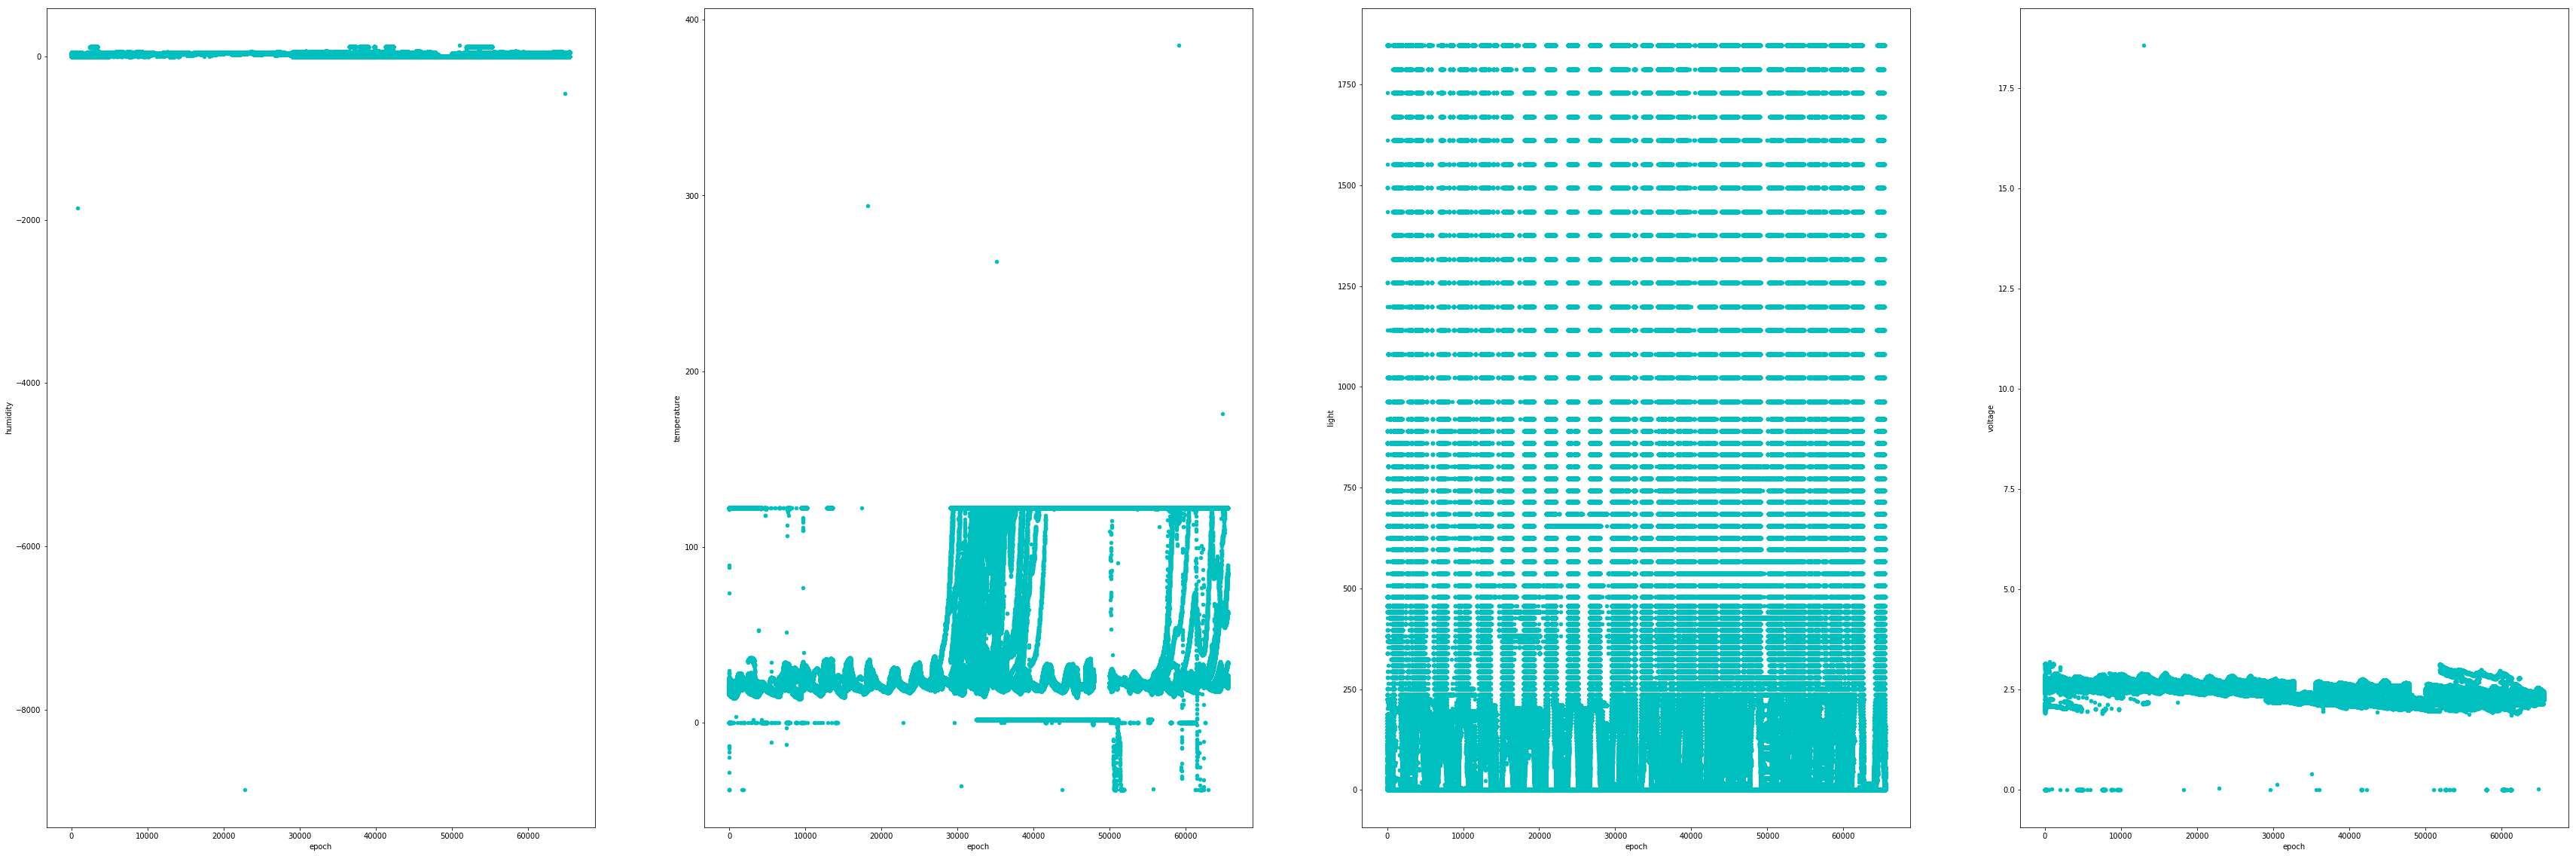

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(60,20))

for xcol, ax in zip(['humidity', 'temperature', 'light','voltage'], axes):
    df.plot(kind='scatter', x='epoch', y=xcol, ax=ax, alpha=1, color='c')

### Relation between Humidity, Light, Voltage with respect to Temperature

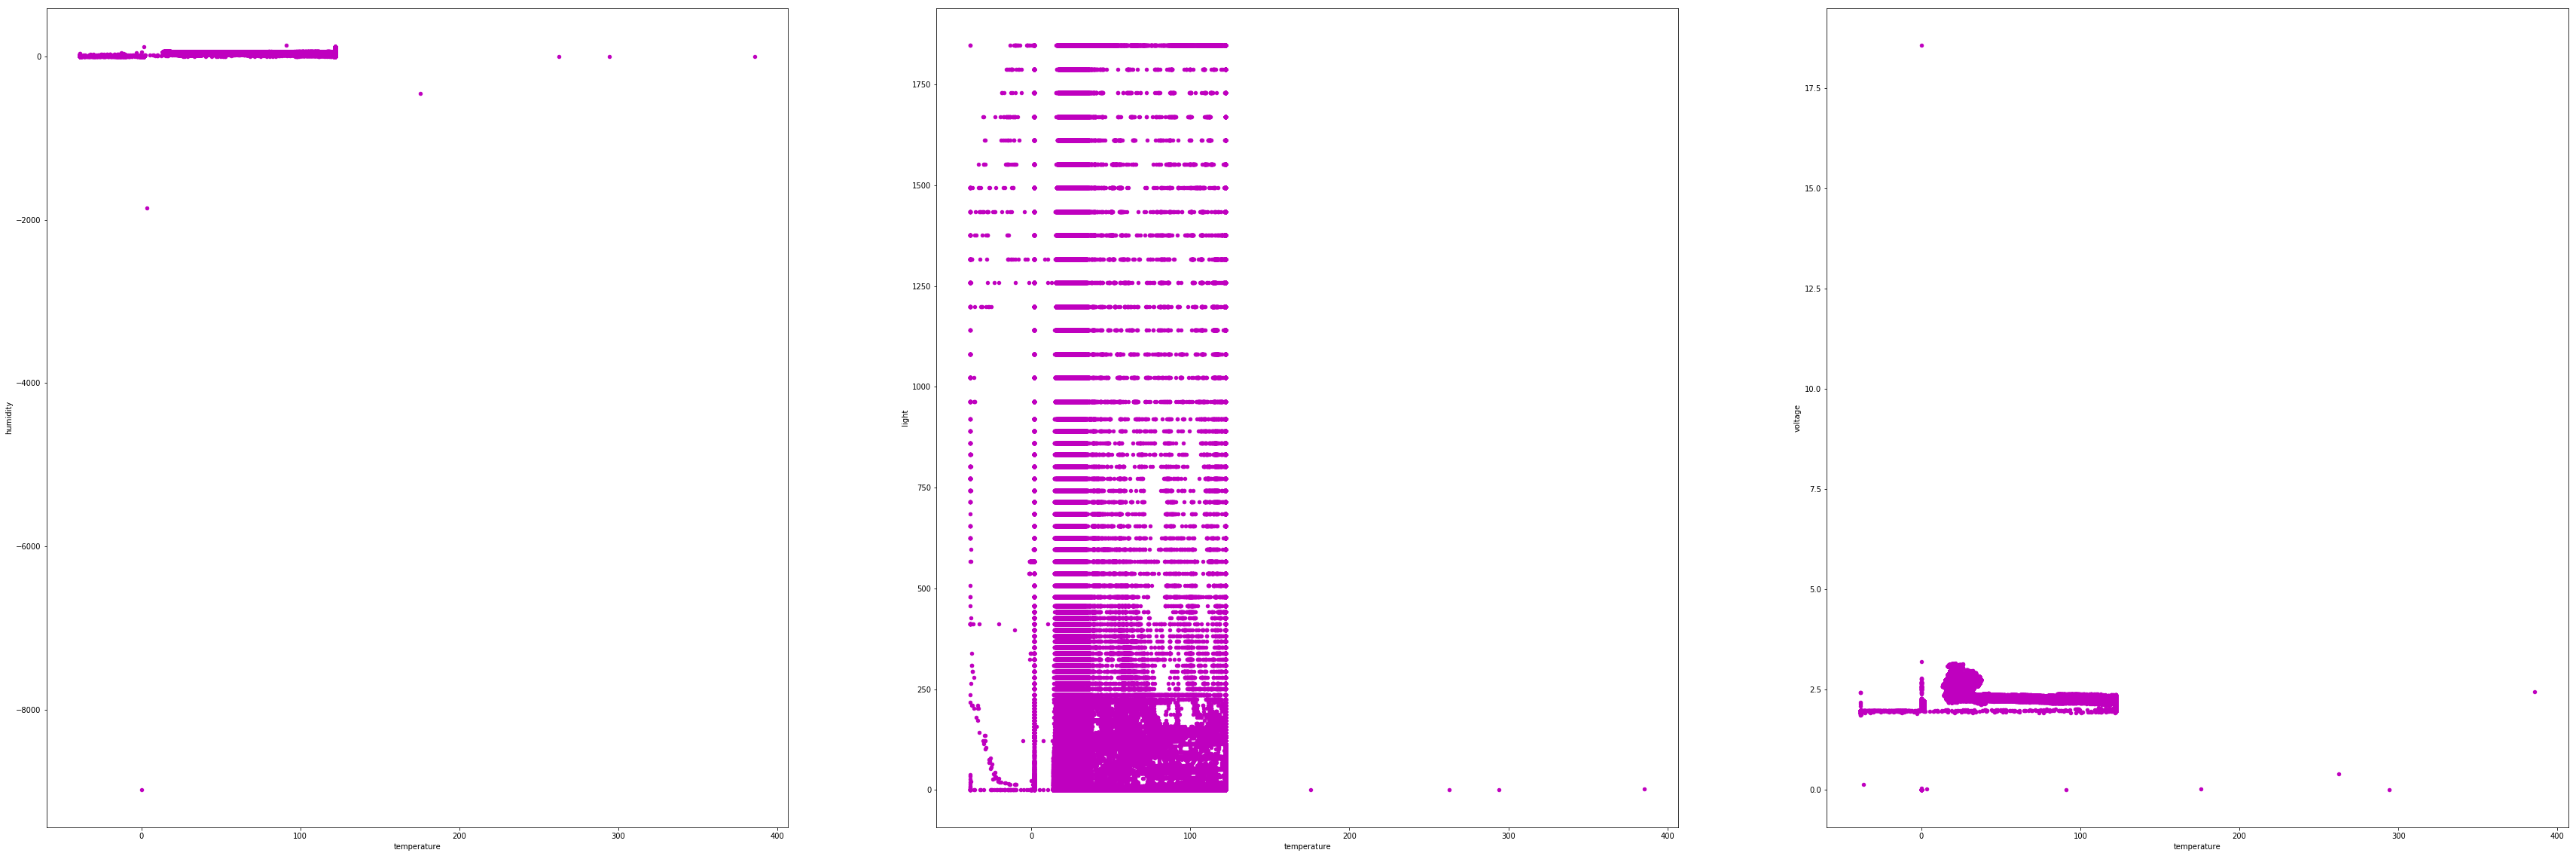

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,20))

for xcol, ax in zip(['humidity', 'light','voltage'], axes):
    df.plot(kind='scatter', x='temperature', y=xcol, ax=ax, alpha=1, color='m')

### Relation between Temperature, Light, Voltage with respect to Humidity

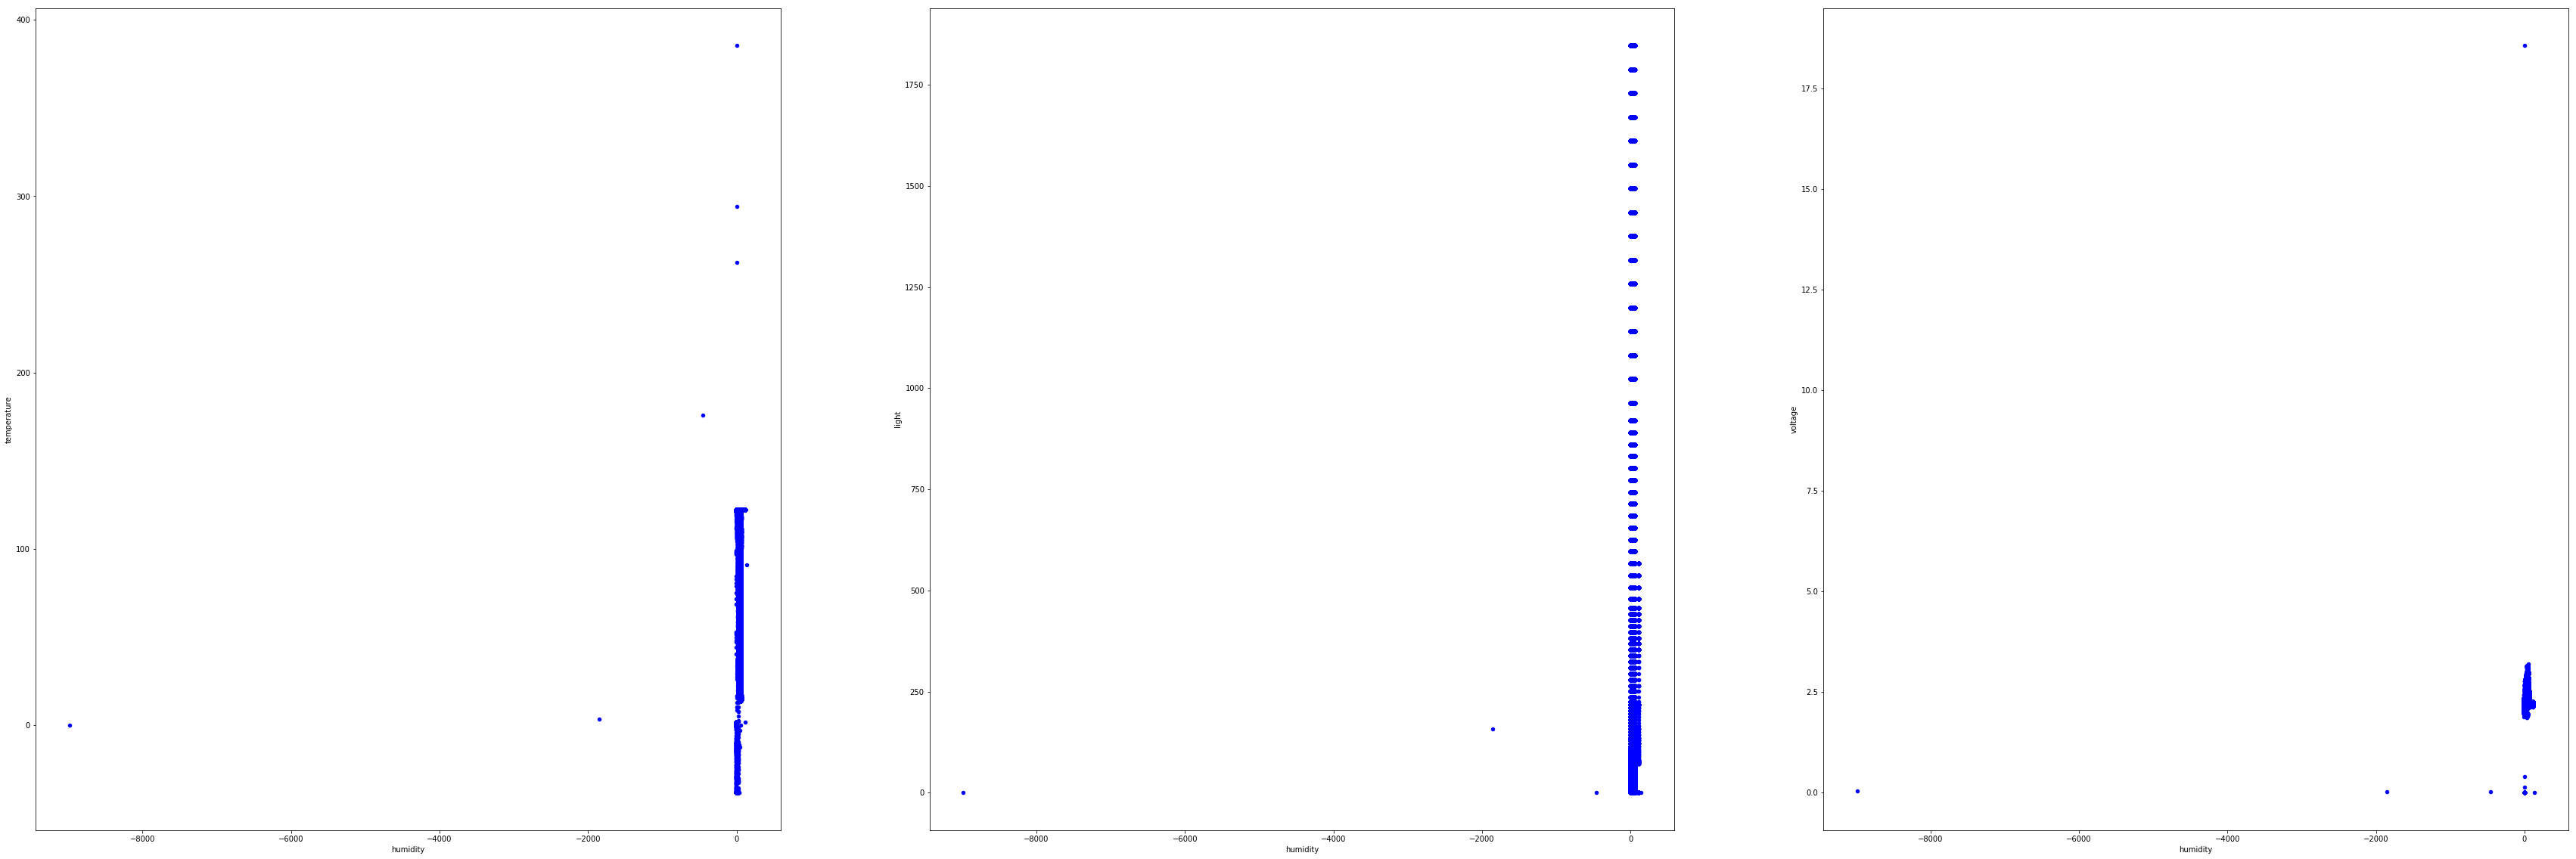

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,20))

for xcol, ax in zip(['temperature', 'light','voltage'], axes):
    df.plot(kind='scatter', x='humidity', y=xcol, ax=ax, alpha=1, color='b')

### Relation between Temperature, Humidity, Voltage with respect to Light

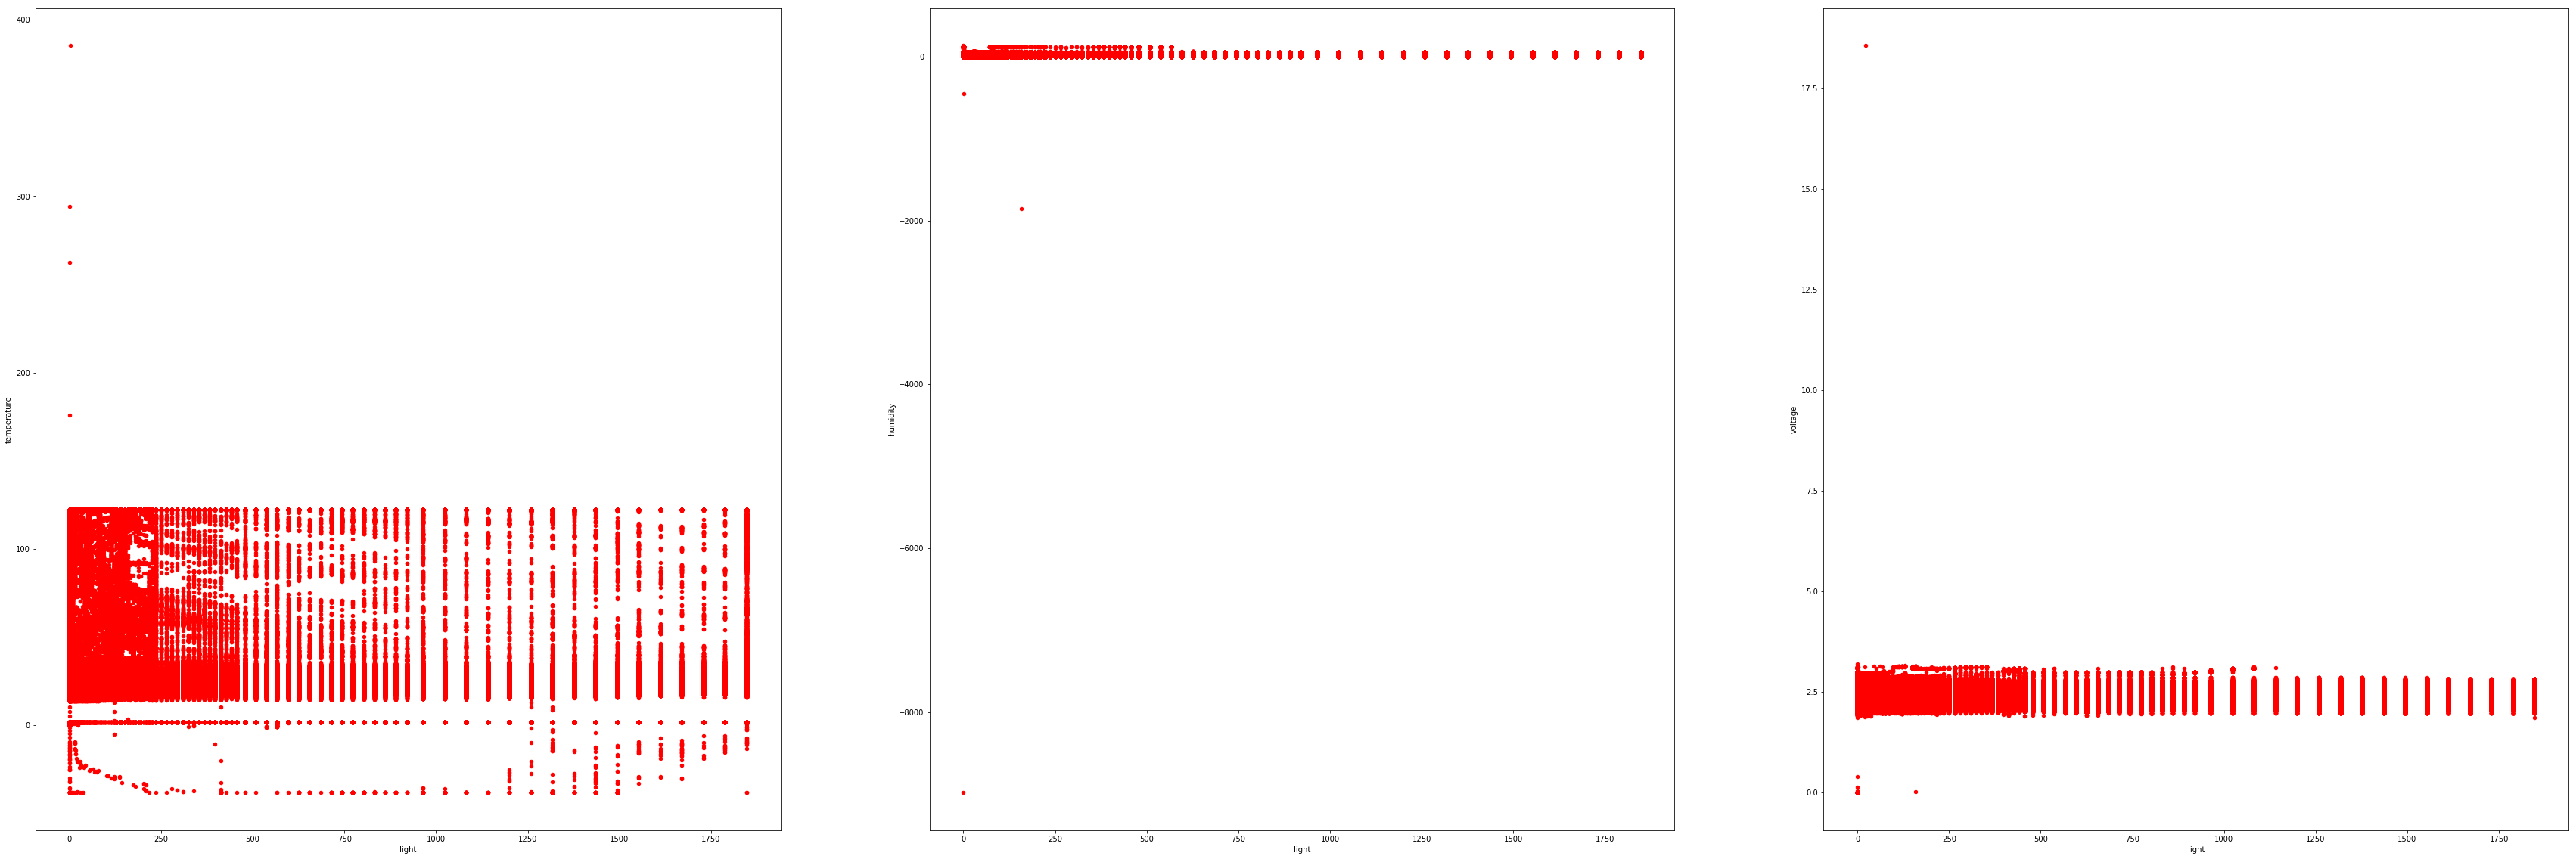

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,20))

for xcol, ax in zip(['temperature', 'humidity','voltage'], axes):
    df.plot(kind='scatter', x='light', y=xcol, ax=ax, alpha=1, color='r')

### Relation between Temperature, Humidity, Light with respect to voltage

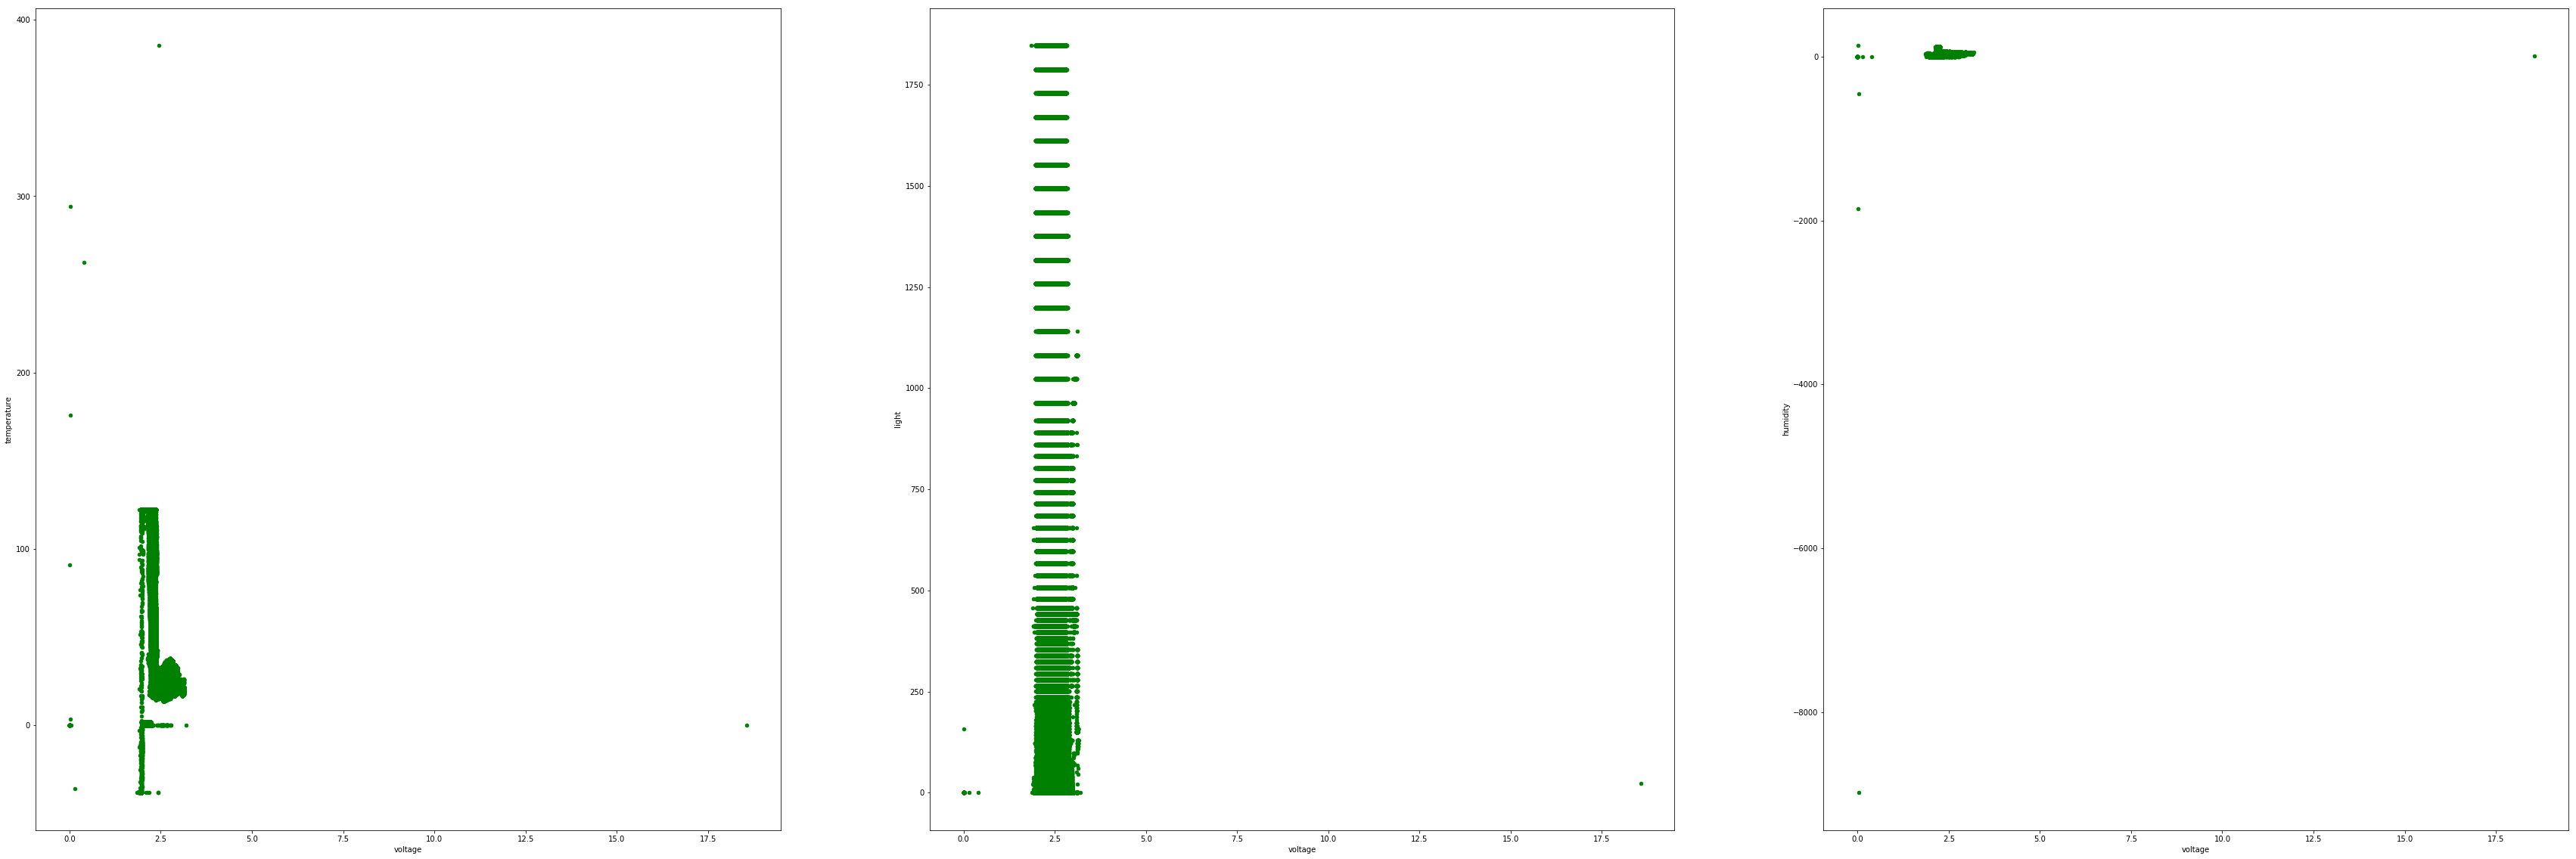

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,20))

for xcol, ax in zip(['temperature', 'light','humidity'], axes):
    df.plot(kind='scatter', x='voltage', y=xcol, ax=ax, alpha=1, color='g')

### Relation of temperature and time(averaged per hour) 

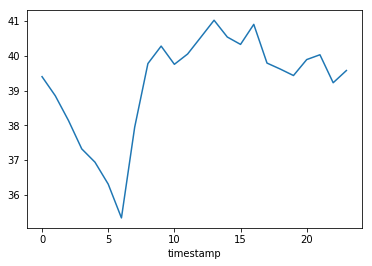

In [19]:
df1.index
index_hour = df1.index.hour
df1_by_hour =df1['temperature'].groupby(index_hour).mean()
df1_by_hour.plot()
plt.show()

Insight: After plotting temperature vs timestamp graph,
we came to know that the minimum temperature in degree celsius is around the 6th hour of the day.
While the temperature fluctuates in the prime hour range from 9th till 23.
The maximum recorded is at 12th hour.

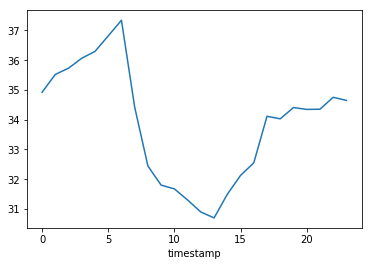

In [21]:
df1.index
index_hour = df1.index.hour
df1_by_hour =df1['humidity'].groupby(index_hour).mean()
df1_by_hour.plot()
plt.show()

Insight: Here humidity changes drastically in the 6th hour being maximum (38) to minimum (30) around 12th hour. And then positively fluctuates after till the end of the day.  

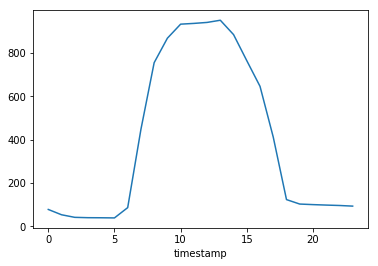

In [22]:
df1.index
index_hour = df1.index.hour
df1_by_hour =df1['light'].groupby(index_hour).mean()
df1_by_hour.plot()
plt.show()

Insight: The usage of light (Lux) increases drastically and stays contant at maximum lux of around 1000 for 3-4 hours. And goes down to minimum at the end. So, we can conclude that the usage of light is maximum from 5th hour til 17th hour of the day.

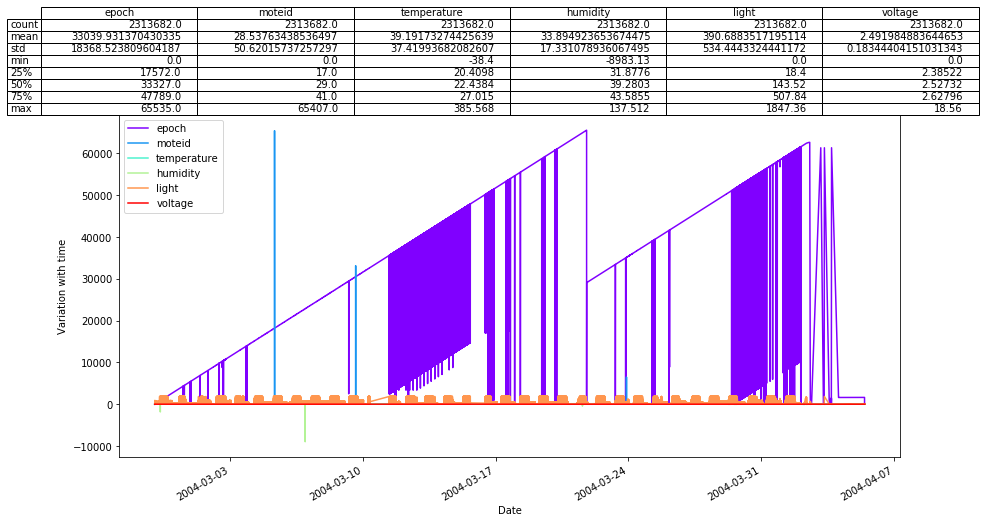

In [27]:
ax = df1.plot(colormap='rainbow', figsize=(14, 7))

ax.set_xlabel('Date')

ax.set_ylabel('Variation with time')

df_summary = df1.describe()

# Specify values of cells in the table
ax.table(cellText=df_summary.values, 
          # Specify width of the table
          colWidths=[0.2]*len(df.columns), 
          # Specify row labels
          rowLabels=df_summary.index, 
          # Specify column labels
          colLabels=df_summary.columns, 
          # Specify location of the table
          loc='top') 

plt.show()

### Plot of variation in moteid, epoch, temperature, humidity, light and voltage against timestamp(in the given order)

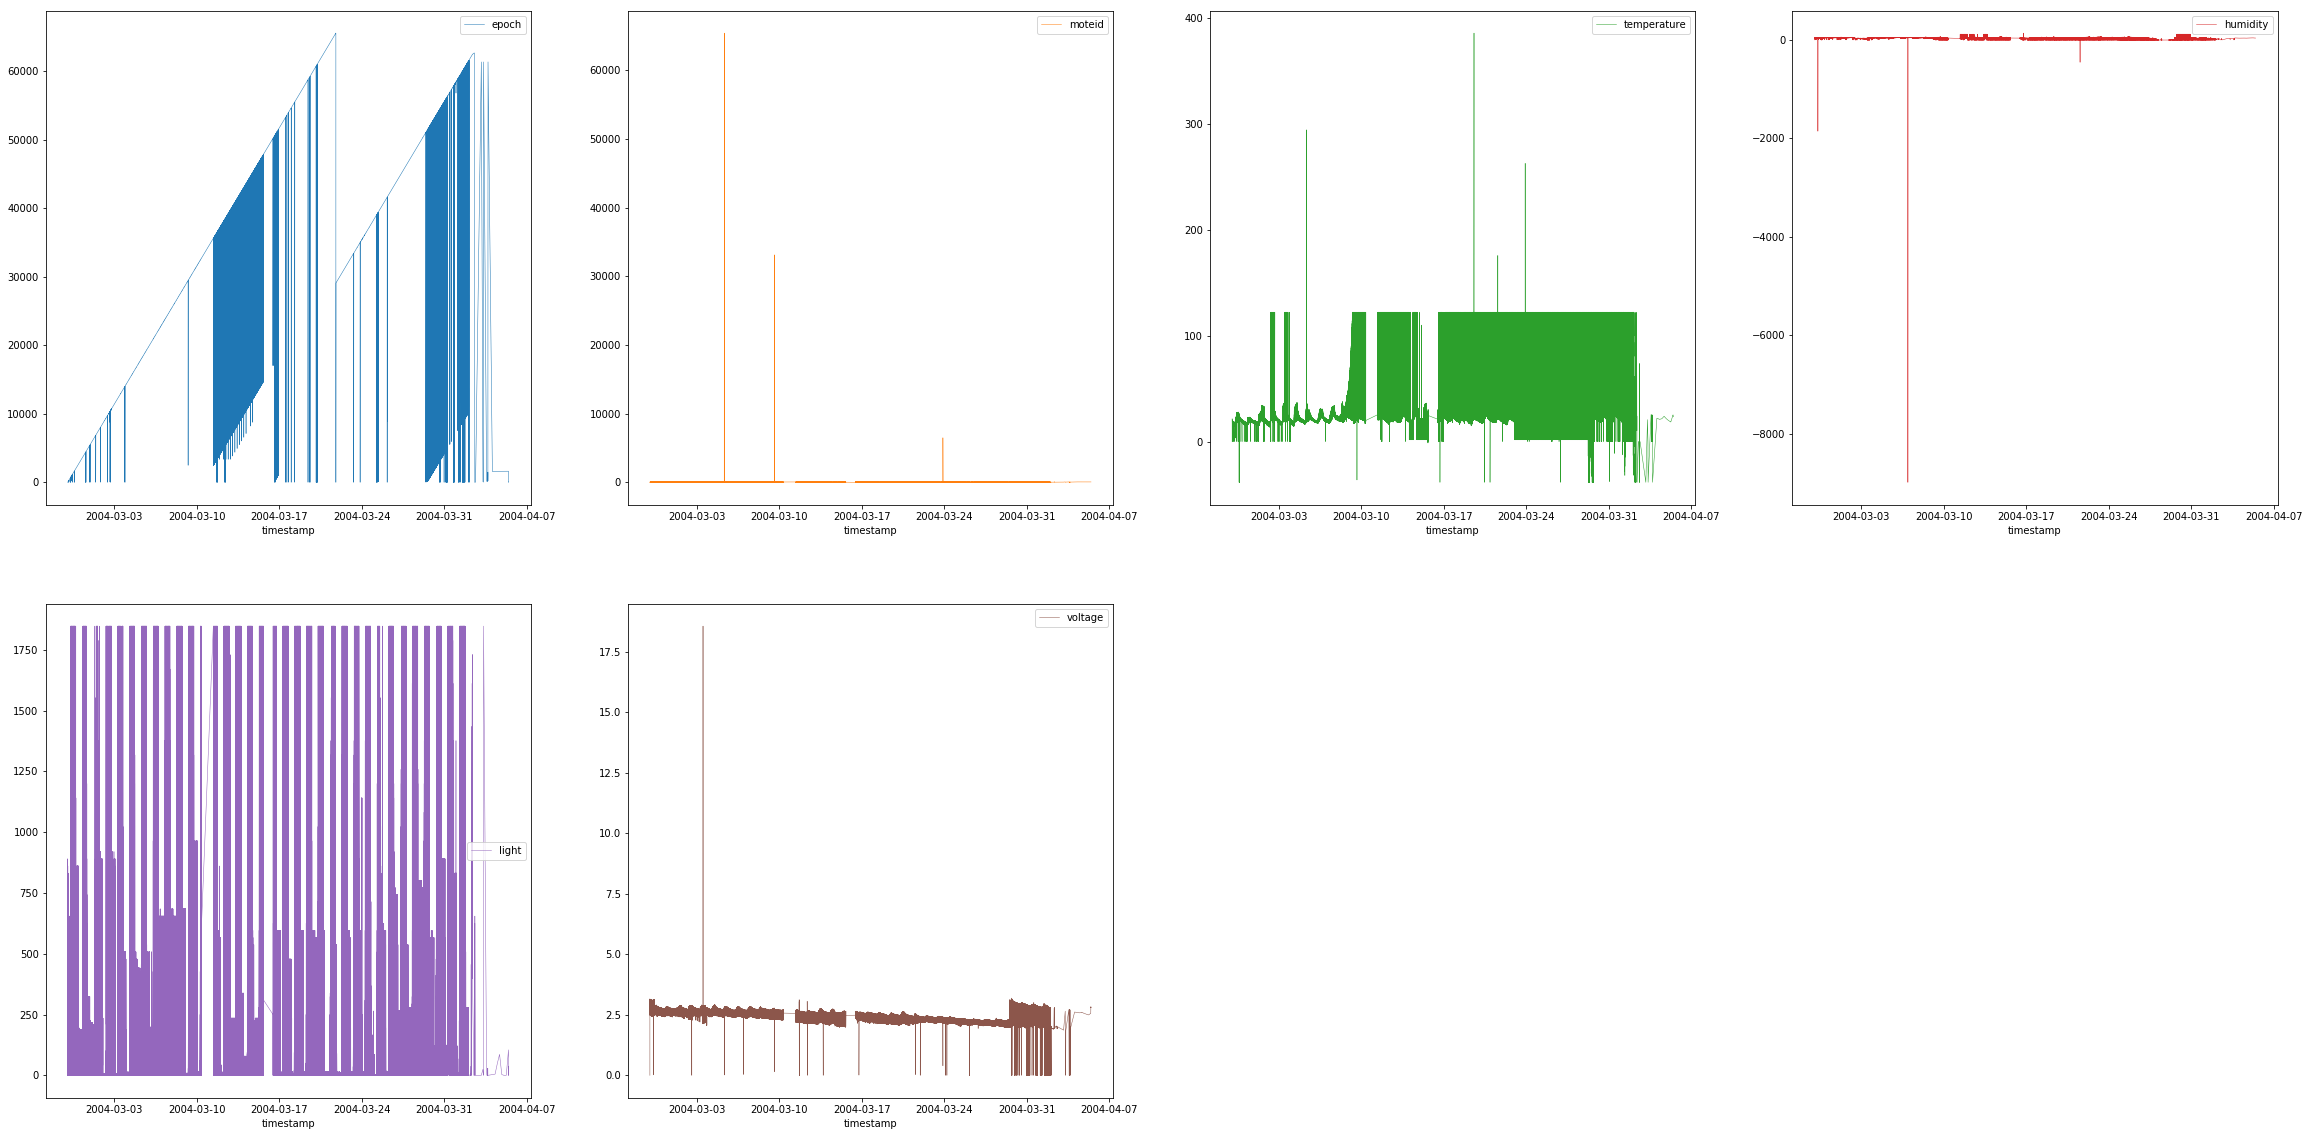

In [28]:
df1.plot(subplots=True,
                linewidth=0.5,
                layout=(2, 4),
                figsize=(40, 20),
                sharex=False,
                sharey=False)

plt.show()

Insight:
1) Epoch graph: The intensity of graph is maximum in the seend week and fifth week correspondingly. It does increases very sharply in the starting of a day.

2) moteid: It does reaches to the value greater than 60k as shown in the figure. It remains zero mainly all other hours in the day.

3) Temperature: It does remains contant but there's an anomaly. Temperature remains like 120 degree celcius all the time which is really high. Also, spotted temperature greater than 350 degree celcius.

4) The intensity of ligh remains same throughout the weeks.

5) Usages of voltage remains same all teh time.

## Correlation between multivariate time series via pearson & spearman method 

In [31]:
corr_mat_sp = df1.corr(method='spearman')
print('---------------------correlation matrix using pearson----------------------')
corr_mat_sp

---------------------correlation matrix using pearson----------------------


,epoch,moteid,temperature,humidity,light,voltage
epoch,1.000000,0.024653,0.341834,-0.074186,0.009739,-0.756496
moteid,0.024653,1.000000,-0.066005,0.101091,0.061005,0.022497
temperature,0.341834,-0.066005,1.000000,-0.647976,0.318111,-0.374683
humidity,-0.074186,0.101091,-0.647976,1.000000,-0.253994,0.085385
light,0.009739,0.061005,0.318111,-0.253994,1.000000,0.089489
voltage,-0.756496,0.022497,-0.374683,0.085385,0.089489,1.000000


### The following heatmap has the similar time series placed together

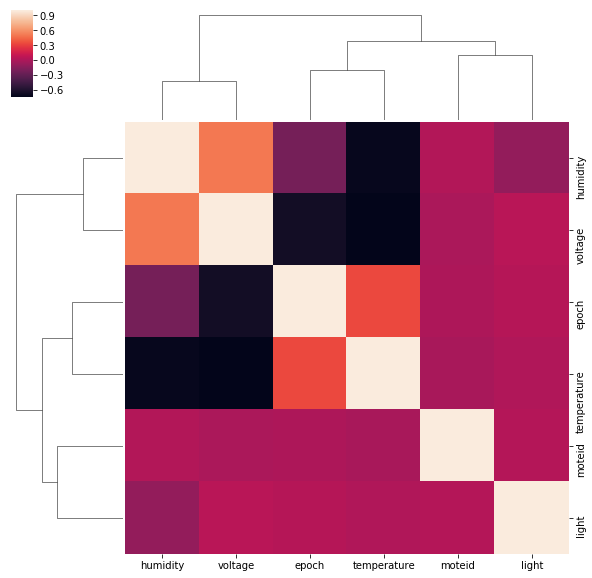

In [32]:
import seaborn as sns
sns.clustermap(corr_mat_p)

So, we can conclude from the given dataset that temperature and humidity are high negatively correlated.
In the above heatmap, it is clearly shown. Humidity is directly proportional to voltage which means
if voltage is increasing, humidity does also. 